1. CNN-Architecture for Lithography Quality Control 

1.1. Effect of the learning rate on the neural network performance

Dieser Vorgang wird auf cuda:0
Learning rate: 1e-05, Epoch 1 / 30, Loss: 0.20226821529547293
Learning rate: 1e-05, Epoch 2 / 30, Loss: 0.11696263100852544
Learning rate: 1e-05, Epoch 3 / 30, Loss: 0.11151908246878109
Learning rate: 1e-05, Epoch 4 / 30, Loss: 0.10798362137896965
Learning rate: 1e-05, Epoch 5 / 30, Loss: 0.1050168895026248
Learning rate: 1e-05, Epoch 6 / 30, Loss: 0.10271510968090723
Learning rate: 1e-05, Epoch 7 / 30, Loss: 0.10077311240687824
Learning rate: 1e-05, Epoch 8 / 30, Loss: 0.09881430668151732
Learning rate: 1e-05, Epoch 9 / 30, Loss: 0.09721713940897478
Learning rate: 1e-05, Epoch 10 / 30, Loss: 0.09500002786704627
Learning rate: 1e-05, Epoch 11 / 30, Loss: 0.09334259366323196
Learning rate: 1e-05, Epoch 12 / 30, Loss: 0.09055901885437617
Learning rate: 1e-05, Epoch 13 / 30, Loss: 0.08875689816552908
Learning rate: 1e-05, Epoch 14 / 30, Loss: 0.08717351936265098
Learning rate: 1e-05, Epoch 15 / 30, Loss: 0.08392740638029518
Learning rate: 1e-05, Epoch 16 / 3

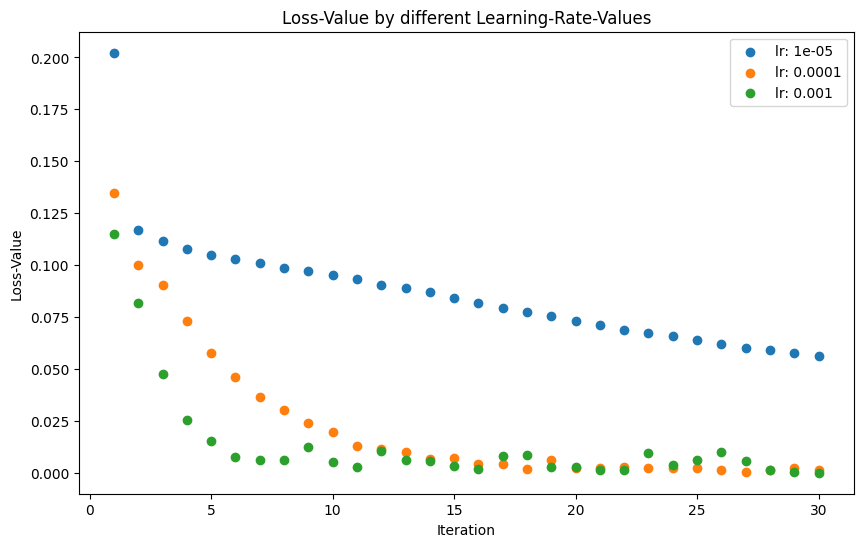

Training is finished


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Moaiad\\Documents\\Lithography\\data\\WaferMap\\test_data\\test_image.jpg'

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from PIL import Image

# Datenpfad und Transformationen
data_directory = r'C:\Users\Moaiad\Documents\Lithography\data\WaferMap'
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = ImageFolder(os.path.join(
    data_directory, 'train_data'), transform=transform)
val_dataset = ImageFolder(os.path.join(
    data_directory, 'val_data'), transform=transform)

train_dataloader = DataLoader(
    train_dataset, batch_size=32, shuffle=True, num_workers=1)
val_dataloader = DataLoader(
    val_dataset, batch_size=32, shuffle=True, num_workers=1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Dieser Vorgang wird auf {}".format(device))

# Modelldefinition


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 3)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Initialisierung des Plots
plt.figure(figsize=(10, 6))
plt.xlabel('Iteration')
plt.ylabel('Loss-Value')
plt.title('Loss-Value by different Learning-Rate-Values')

# Trainingsschleife mit verschiedenen Lernraten
lr_rate_list = [0.00001, 0.0001, 0.001]
for lr_value in lr_rate_list:
    model = CNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr_value)
    epochs = 30
    epoch_list = []
    loss_values = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_dataset)
        loss_values.append(epoch_loss)
        epoch_list.append(epoch + 1)
        print('Learning rate: {}, Epoch {} / {}, Loss: {}'.format(lr_value, epoch+1, epochs, epoch_loss))
    plt.scatter(epoch_list, loss_values, label='lr: {}'.format(lr_value))

plt.legend()
plt.show()
print('Training is finished')

# Modell speichern und laden
torch.save(model.state_dict(), 'trained_model.pth')
model = CNN()
model.load_state_dict(torch.load('trained_model.pth'))
model.eval()

# Einzelbildvorhersage
test_image_path = r"C:\Users\Moaiad\Documents\Lithography\data\WaferMap\test_data\test_image.jpg"  # Ein Bildpfad
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_image = Image.open(test_image_path)
test_image = test_transform(test_image).unsqueeze(0)

# Bildvorhersage
image_testing = test_image.to(device)
outputs = model(image_testing)
_, predicted = torch.max(outputs, 1)
prediction = predicted.item()
classes = ['None', 'Scratch', 'Random']
predicted_class = classes[prediction]
print("Predicted Class:", predicted_class)

1.2. Effect of the activation function on the neural network performance 

Dieser Vorgang wird auf cuda:0
Learning_Rate: 0.001, Aktivierungsfunktion: Sigmoid, Epoch: 1 / 30, Loss-Wert: 0.6085195303563203
Learning_Rate: 0.001, Aktivierungsfunktion: Sigmoid, Epoch: 2 / 30, Loss-Wert: 0.6072850804744081
Learning_Rate: 0.001, Aktivierungsfunktion: Sigmoid, Epoch: 3 / 30, Loss-Wert: 0.6072687643523424
Learning_Rate: 0.001, Aktivierungsfunktion: Sigmoid, Epoch: 4 / 30, Loss-Wert: 0.6072635287547388
Learning_Rate: 0.001, Aktivierungsfunktion: Sigmoid, Epoch: 5 / 30, Loss-Wert: 0.6072611134077475
Learning_Rate: 0.001, Aktivierungsfunktion: Sigmoid, Epoch: 6 / 30, Loss-Wert: 0.6072597390392286
Learning_Rate: 0.001, Aktivierungsfunktion: Sigmoid, Epoch: 7 / 30, Loss-Wert: 0.6072591497901701
Learning_Rate: 0.001, Aktivierungsfunktion: Sigmoid, Epoch: 8 / 30, Loss-Wert: 0.6072585814132364
Learning_Rate: 0.001, Aktivierungsfunktion: Sigmoid, Epoch: 9 / 30, Loss-Wert: 0.607258192306196
Learning_Rate: 0.001, Aktivierungsfunktion: Sigmoid, Epoch: 10 / 30, Loss-Wert: 0.607257

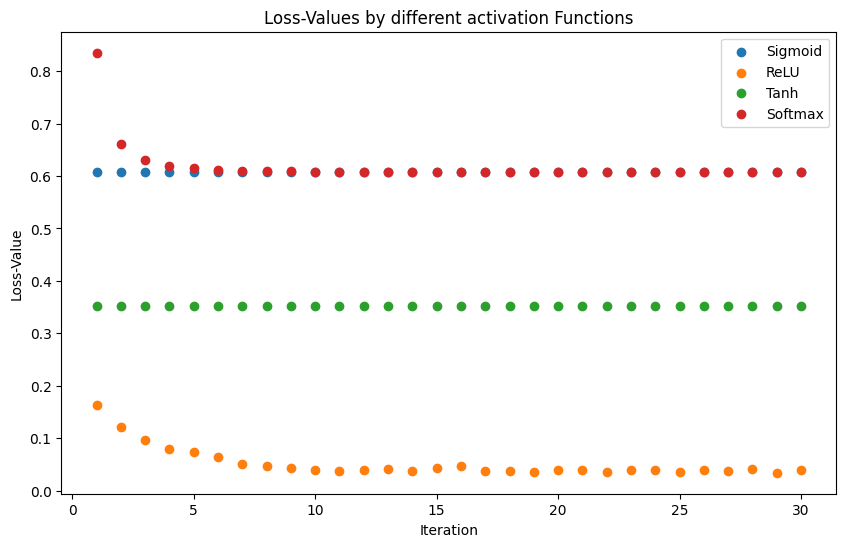

Training Finished


In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader  # Korrektur: von dataloader zu DataLoader
from torchvision.datasets import ImageFolder

data_directory = r'C:\Users\Moaiad\Documents\Lithography\data\WaferMap'
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),  # Korrektur: ToTorch() zu ToTensor()
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = ImageFolder(os.path.join(data_directory, 'train_data'), transform=transform)
val_dataset = ImageFolder(os.path.join(data_directory, 'val_data'), transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=1)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=1)  # Korrektur: val_dataset zu val_dataloader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Dieser Vorgang wird auf {}".format(device))

class CNN(nn.Module):
    def __init__(self, activation_function):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Korrektur: MaxUnpool2d zu MaxPool2d
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)  # Korrektur: Eingabedimension für fc1
        self.fc2 = nn.Linear(512, 3)
        self.activation_function = activation_function

    def forward(self, x):
        x = self.pool(self.activation_function(self.conv1(x)))
        x = self.pool(self.activation_function(self.conv2(x)))
        x = self.pool(self.activation_function(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)  # Flatten
        x = self.dropout(x)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        return x

lr_rate_liste = [0.001]

plt.figure(figsize=(10, 6))
plt.xlabel('Iteration')
plt.ylabel('Loss-Value')
plt.title('Loss-Values by different activation Functions')

for activation_function in [nn.Sigmoid(), nn.ReLU(), nn.Tanh(), nn.Softmax(dim=1)]:
    loss_values = []
    epochs = 30
    for lr_value in lr_rate_liste:
        model = CNN(activation_function).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr_value)
        epoch_list = []
        for epoch in range(epochs):
            model.train()
            running_loss = 0.0
            for inputs, labels in train_dataloader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * inputs.size(0)
            epoch_loss = running_loss / len(train_dataset)
            loss_values.append(epoch_loss)
            epoch_list.append(epoch + 1)
            print("Learning_Rate: {}, Aktivierungsfunktion: {}, Epoch: {} / {}, Loss-Wert: {}".format(lr_value, activation_function.__class__.__name__, epoch + 1, epochs, epoch_loss))
    plt.scatter(range(1, epochs + 1), loss_values, label="{}".format(activation_function.__class__.__name__))  # Korrektur der Labels

plt.legend()
plt.show()

print("Training Finished")

1.3. Effect of the number of the full-connected layers on the performance of the neural network

Dieser Vorgang wird auf cuda:0
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 1 of 30, Loss: 0.11939931886564054
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 2 of 30, Loss: 0.0921912847205839
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 3 of 30, Loss: 0.07009087179871355
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 4 of 30, Loss: 0.04052428144423285
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 5 of 30, Loss: 0.020788449530191995
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 6 of 30, Loss: 0.011254416892033296
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 7 of 30, Loss: 0.007999276294479453
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 8 of 30, Loss: 0.006759024438787199
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 9 of 30, Loss: 0.007221087458519267
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 10 of 30, Loss: 0.0016393305249211999
Model: CNN_OneLayer, Learning Rate: 0.001, Epoch: 11 of 30, Loss: 0.004362739039581162
Model: CNN_OneLayer, Lear

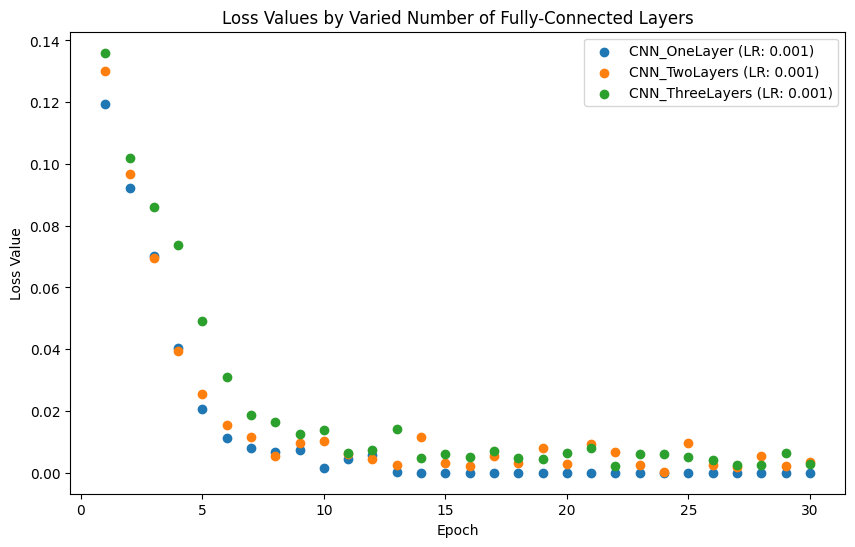

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

data_directory = r'C:\Users\Moaiad\Documents\Lithography\data\WaferMap'
transform = transforms.Compose([transforms.Resize((64, 64)), transforms.ToTensor(), transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])
train_dataset = ImageFolder(os.path.join(data_directory, 'train_data'), transform=transform)
val_dataset = ImageFolder(os.path.join(data_directory, 'val_data'), transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=1)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Dieser Vorgang wird auf {}".format(device))


class CNN_OneLayer(nn.Module):
    def __init__(self):
        super(CNN_OneLayer, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(128 * 8 * 8, 512)
        self.output = nn.Linear(512, 3)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = nn.functional.relu(self.fc(x))
        x = self.output(x)
        return x


class CNN_TwoLayers(nn.Module):
    def __init__(self):
        super(CNN_TwoLayers, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 128)
        self.output = nn.Linear(128, 3)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(x)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.output(x)
        return x


class CNN_ThreeLayers(nn.Module):
    def __init__(self):
        super(CNN_ThreeLayers, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.output = nn.Linear(128, 3)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(x)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = self.output(x)
        return x


lr_rate_liste = [0.001]
plt.figure(figsize=(10, 6))
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.title("Loss Values by Varied Number of Fully-Connected Layers")

for model_class in [CNN_OneLayer, CNN_TwoLayers, CNN_ThreeLayers]:
    for lr_value in lr_rate_liste:
        model = model_class().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr_value)

        epochs = 30
        epoch_list = list(range(1, epochs + 1))
        loss_values = []

        # Training der aktuellen Architektur
        for epoch in range(epochs):
            model.train()
            running_loss = 0.0
            for inputs, labels in train_dataloader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * inputs.size(0)

            # Berechnung des durchschnittlichen Verlusts für die Epoche
            epoch_loss = running_loss / len(train_dataset)
            loss_values.append(epoch_loss)
            print("Model: {}, Learning Rate: {}, Epoch: {} of {}, Loss: {}".format(model_class.__name__, lr_value, epoch + 1, epochs, epoch_loss))

        # Verlustkurve für das aktuelle Modell plotten
        plt.scatter(epoch_list, loss_values, label="{} (LR: {})".format(model_class.__name__, lr_value))

plt.legend()
plt.show()


2. Optimization of Hyperparameter utilizing Excursus Evolutionary Optimization:

Dieser Vorgang wird auf cuda
LR: 0.001, FC1: 128, Loss: 0.29827570810307
LR: 0.0030204081632653063, FC1: 128, Loss: 0.47973183189694163
LR: 0.0050408163265306125, FC1: 128, Loss: 0.5512703305031569
LR: 0.007061224489795919, FC1: 128, Loss: 0.537557888682709
LR: 0.009081632653061226, FC1: 128, Loss: 0.6080787924914214
LR: 0.011102040816326531, FC1: 128, Loss: 0.5932661200390492
LR: 0.013122448979591837, FC1: 128, Loss: 0.6324528286888671
LR: 0.015142857142857145, FC1: 128, Loss: 1.7905023681642942
LR: 0.01716326530612245, FC1: 128, Loss: 0.7615468464369001
LR: 0.019183673469387756, FC1: 128, Loss: 1.0770006556811949
LR: 0.02120408163265306, FC1: 128, Loss: 2.3487630922153526
LR: 0.02322448979591837, FC1: 128, Loss: 0.9070602776120273
LR: 0.025244897959183676, FC1: 128, Loss: 1.5567556660342503
LR: 0.02726530612244898, FC1: 128, Loss: 2.1218844230831886
LR: 0.02928571428571429, FC1: 128, Loss: 1.4208162075854172
LR: 0.031306122448979595, FC1: 128, Loss: 1.7163643363359133
LR: 0.033326530

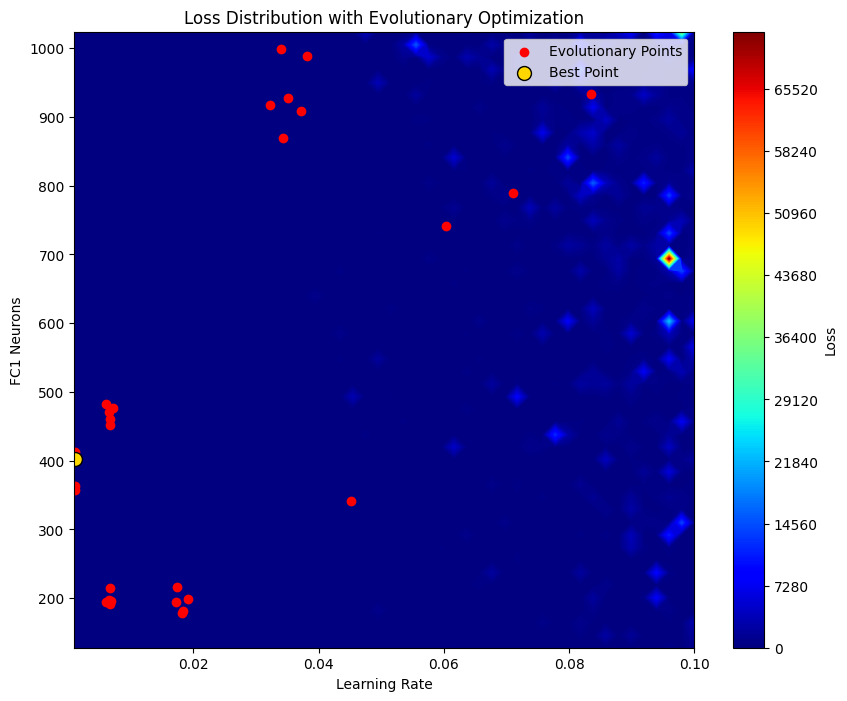

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Datenpfad und Transformationen
data_directory = r'C:\Users\Moaiad\Documents\Lithography\data\WaferMap'
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = ImageFolder(os.path.join(
    data_directory, 'train_data'), transform=transform)
val_dataset = ImageFolder(os.path.join(
    data_directory, 'val_data'), transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=1)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Dieser Vorgang wird auf {}".format(device))

# Modelldefinition


class CNN(nn.Module):
    def __init__(self, fc1_neurons):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 8 * 8, fc1_neurons)
        self.fc2 = nn.Linear(fc1_neurons, 3)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(x)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Hyperparameter-Konfiguration
lr_rate_list = np.linspace(0.001, 0.1, 50)
fc1_neurons_list = np.linspace(128, 1024, 50, dtype=int)
epochs = 5
loss_distribution = np.zeros((len(fc1_neurons_list), len(lr_rate_list)))

# Verlustberechnung und Visualisierung
for i, fc1_neurons in enumerate(fc1_neurons_list):
    for j, lr_value in enumerate(lr_rate_list):
        model = CNN(fc1_neurons).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr_value)

        running_loss = 0.0
        for epoch in range(epochs):
            model.train()
            for inputs, labels in train_dataloader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * inputs.size(0)
        loss_distribution[i, j] = running_loss / len(train_dataset)
        print("LR: {}, FC1: {}, Loss: {}".format(lr_value, fc1_neurons, loss_distribution[i, j]))

# Evolutionäre Hyperparameteroptimierung


def evaluate_hyperparameters(lr, fc1_neurons):
    model = CNN(fc1_neurons).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    running_loss = 0.0
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
    return running_loss / len(train_dataset)


# Evolutionärer Prozess
np.random.seed(42)
population_size = 10
generations = 5
mutation_rate = 0.1

population = [(np.random.uniform(0.001, 0.1), np.random.randint(128, 1024)) for _ in range(population_size)]
evolutionary_points = []

for gen in range(generations):
    fitness = []
    for lr, fc1_neurons in population:
        loss = evaluate_hyperparameters(lr, fc1_neurons)
        fitness.append((loss, lr, fc1_neurons))
        evolutionary_points.append((lr, fc1_neurons, loss))

    fitness.sort(key=lambda x: x[0])
    top_performers = fitness[:population_size // 2]
    new_population = []
    for _, lr, fc1_neurons in top_performers:
        new_lr = lr * (1 + np.random.uniform(-mutation_rate, mutation_rate))
        new_fc1 = int(
            fc1_neurons * (1 + np.random.uniform(-mutation_rate, mutation_rate)))
        new_lr = np.clip(new_lr, 0.001, 0.1)
        new_fc1 = np.clip(new_fc1, 128, 1024)
        new_population.append((new_lr, new_fc1))
    population = new_population

evolutionary_points = np.array(evolutionary_points)

# Visualisierung
best_point = min(evolutionary_points, key=lambda x: x[2])
print("\nBester Punkt: LR: {}, FC1: {}, Loss: {}".format(best_point[0], int(best_point[1]), best_point[2]))

plt.figure(figsize=(10, 8))
plt.contourf(lr_rate_list, fc1_neurons_list, loss_distribution, levels=1000, cmap='jet')
plt.colorbar(label='Loss')
plt.scatter(evolutionary_points[:, 0], evolutionary_points[:,1], c='red', label='Evolutionary Points')
plt.scatter(best_point[0], best_point[1], c='gold', edgecolor='black', s=100, label='Best Point')
plt.title("Loss Distribution with Evolutionary Optimization")
plt.xlabel("Learning Rate")
plt.ylabel("FC1 Neurons")
plt.legend()
plt.show()